Question 1:  What is Simple Linear Regression?

1. Simple linear regression is an approach for predicting a response using a single feature. It is one of the most basic and simple machine learning models. In linear regression we assume that the two variables i.e. dependent and independent variables are linearly related.

2. Simple linear regression helps make predictions and understand relationships between one independent variable and one dependent variable. For example, you might want to know how a tree’s height (independent variable) affects the number of leaves it has (dependent variable). By collecting data and fitting a simple linear regression model, you could predict the number of leaves based on the tree's height. This is the ‘making predictions’ part. But this approach also reveals how much the number of leaves changes, on average, as the tree grows taller, which is how simple linear regression is also used to understand relationships.

Question 2: What are the key assumptions of Simple Linear Regression?

1. Linearity: The relationship between the independent and dependent variables must be linear. If the relationship is non-linear, the model won’t capture it well.

2. Independence of Errors: Residuals should be independent of each other. This means there should be no patterns or correlations between the residuals. This is something to watch for closely in time-ordered data.
3. Homoscedasticity: The residuals should have constant variance across all values of the independent variable. If the variance changes (heteroscedasticity), predictions in certain ranges of x may become less accurate.
4. Normality of Residuals: Residuals should ideally follow a normal, or Gaussian distribution. This is important for statistical testing, and asserting levels of confidence in our estimate. It’s less critical for making predictions.

Question 3: What is heteroscedasticity, and why is it important to address in regression
models?

1. Heteroscedasticity refers to a situation in which the variability of a dependent variable is unequal across the range of values of an independent variable. Or, for a definition more anchored in model-building, we could say that heteroscedasticity happens when the spread or dispersion of residuals is not constant, as we sometimes see in a model like a regression model or a time series model.
2. Heteroscedasticity can lead to inefficient estimates of regression coefficients, making hypothesis tests less reliable. When residuals have unequal variance, it can affect the standard errors, confidence intervals, and significance tests of predictors, leading to incorrect conclusions.

Question 4: What is Multiple Linear Regression?

1. Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable.
2. Y = a0 + a1x1 + a2x2 + ... + anxn + ε,
where a0 is the intercept, a1, a2, ... are coefficients for each independent variable (x1, x2, ...), and ε is the error term.


Question 5: What is polynomial regression, and how does it differ from linear
regression?

1. In polynomial regression, we describe the relationship between the independent variable x and the dependent variable y using an nth-degree polynomial in x. Polynomial regression, denoted as E(y | x), characterizes fitting a nonlinear relationship between the x value and the conditional mean of y.
2. y=a0+a1x+a2x2+a3x3+….+anxn

where y is dependent variable
x is the independent variable and
a0,a1,a2,a3,an are the coefficients.
3. Linear regression assumes a straight-line relationship between dependent and independent variables. Suitable for linear trends. And Polynomial Regression Can model non-linear relationships by fitting a polynomial equation to the data. Ideal for complex patterns.

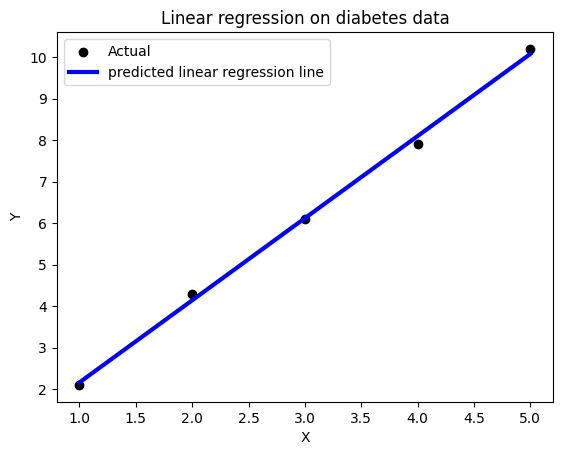

In [ ]:
'''Question 6:  Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 2, 3, 4, 5]).reshape(-1,1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,Y)
y_pred=model.predict(X)
#visualize the result

plt.scatter(X,Y,color="black",label="Actual")
plt.plot(X,y_pred,color="blue",linewidth=3,label="predicted linear regression line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear regression on diabetes data")
plt.legend()
plt.show()

In [1]:
'''Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.'''
Area  = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = pd.DataFrame({'Area': [1200, 1500, 1800, 2000], 'Rooms': [2, 3, 3, 4]})
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)



  feature         VIF
0    Area  127.796923
1   Rooms  127.796923


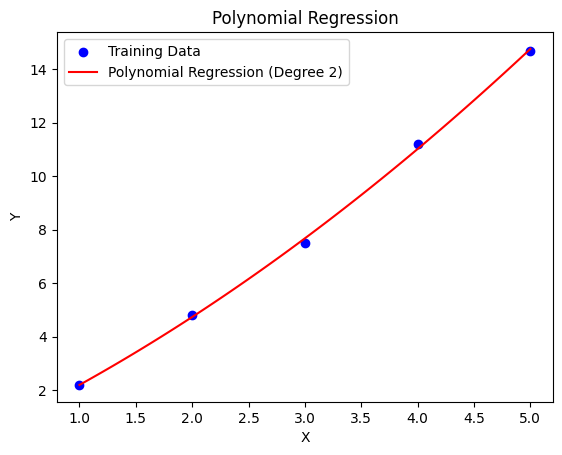

In [15]:
'''Question 8:  Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.
'''

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, Y)

x_range = np.linspace(1, 5, 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)

plt.scatter(X, Y, label="Training Data", color="blue")
plt.plot(x_range, poly_reg.predict(x_range_poly), color="red",label=f"Polynomial Regression (Degree 2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression")
plt.legend()
plt.show()



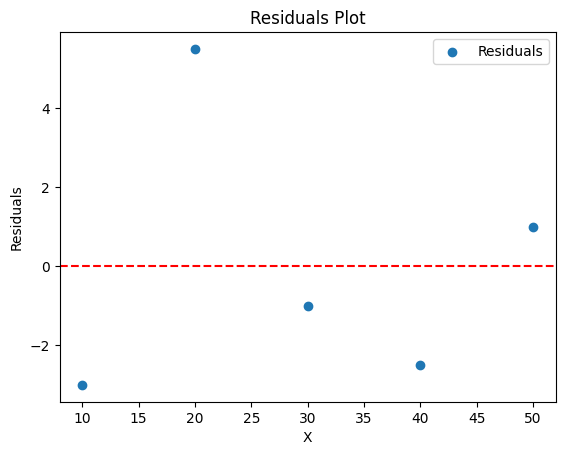

In [19]:
'''Question 9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.'''

X = [10, 20, 30, 40, 50]
Y = [15, 35, 40, 50, 65]
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
residuals = Y - Y_pred

plt.scatter(X, residuals,label="Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()


Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.



Steps for Heteroscedacity
1. Visual Diagnosis:

* Plot residuals vs. predicted values.

* Look for patterns like funnel shapes or increasing spread.

2. Statistical Tests:

Use Breusch-Pagan or White’s test to confirm heteroscedasticity.

3. Solutions:

* Transform the dependent variable (e.g., log transformation of price).

* Use Weighted Least Squares (WLS) to give less weight to observations with higher variance.

* Consider robust standard errors to adjust inference without changing the model.

steps for multi-collinearity

1. Detection:

Calculate Variance Inflation Factor (VIF) for each predictor.

VIF > 5 or 10 indicates problematic multicollinearity.

2. Solutions:

 * Remove or combine correlated variables (e.g., drop one of two highly correlated features).

* Apply Principal Component Analysis (PCA) to reduce dimensionality.

* Use regularization techniques like Ridge Regression or Lasso, which penalize large coefficients and reduce overfitting.